In [1]:
import os
import pandas as pd
import json
import plotly.express as px

In [2]:
cp_folder = os.path.abspath('../checkpoints')
out_folder = os.path.abspath('../out')

In [ ]:
hpt_data = []
for i in range(5):
    for j in range(3):
        data_file = os.path.join(cp_folder, 'HPT_resnet_50',
                                 f'hpt_resnet50_hpt_outer_{i}_inner_{j}_exp_summary.csv')
        df = pd.read_csv(data_file)
        df['outer_fold'] = i
        df['inner_fold'] = j
        hpt_data.append(df)

hpt_data = pd.concat(hpt_data)
hpt_data = hpt_data.loc[:, ~hpt_data.columns.str.startswith('summary')]
hpt_data = hpt_data.drop(columns=['timestamp', 'checkpoint_dir_name', 'should_checkpoint', 
                                  'done', 'trial_id', 'date', 'pid', 'hostname', 'node_ip',
                                  'time_since_restore', 'iterations_since_restore', 'logdir',
                                'config/train_loop_config/train_test_idx', 'training_iteration',
                                'time_this_iter_s'])
hpt_data = hpt_data.rename(columns={'config/train_loop_config/epochs': 'epochs',
                                    'config/train_loop_config/batch_size': 'batch_size',
                                    'config/train_loop_config/lr': 'lr'})

In [ ]:
hpt_data

In [ ]:
hpt_data.to_excel(os.path.join(cp_folder, 'HPT_resnet_50', 'hpt_resnet50_datails_per_fold.xlsx'), index=False)

In [ ]:
hpt_data = []
for i in range(5):
    for j in range(3):
        data_file = os.path.join(cp_folder, 'HPT_wide_resnet_50',
                                 f'hpt_wide_resnet50_hpt_outer_{i}_inner_{j}_exp_summary.csv')
        df = pd.read_csv(data_file)
        df['outer_fold'] = i
        df['inner_fold'] = j
        hpt_data.append(df)

hpt_data = pd.concat(hpt_data)
hpt_data = hpt_data.loc[:, ~hpt_data.columns.str.startswith('summary')]
hpt_data = hpt_data.drop(columns=['timestamp', 'checkpoint_dir_name', 'should_checkpoint', 
                                  'done', 'trial_id', 'date', 'pid', 'hostname', 'node_ip',
                                  'time_since_restore', 'iterations_since_restore', 'logdir',
                                'config/train_loop_config/train_test_idx', 'training_iteration',
                                'time_this_iter_s'])
hpt_data = hpt_data.rename(columns={'config/train_loop_config/epochs': 'epochs',
                                    'config/train_loop_config/batch_size': 'batch_size',
                                    'config/train_loop_config/lr': 'lr'})

In [ ]:
hpt_data.to_excel(os.path.join(cp_folder, 'HPT_wide_resnet_50', 'hpt_wide_resnet50_datails_per_fold.xlsx'), index=False)

In [3]:
cv_data_resnet50 = []
for i in range(5):
    data_file = os.path.join(cp_folder, 'CV_resnet50', f'resnet50_cv_outer_{i}_train_summary.csv')
    df = pd.read_csv(data_file)
    df['outer_fold'] = i
    cv_data_resnet50.append(df)
    
cv_data_resnet50 = pd.concat(cv_data_resnet50)
cv_data_resnet50['epoch'] = cv_data_resnet50['epoch'].astype('int').astype('category')
cv_data_resnet50 = cv_data_resnet50.melt(id_vars=['epoch', 'outer_fold'], var_name='metric', value_name='value')
cv_data_resnet50[['phase', 'metric']] = cv_data_resnet50['metric'].str.split('_', expand=True)

In [4]:
cv_summary_resnet50 = px.line(cv_data_resnet50, x='epoch', 
                        y='value', color='phase', 
                        facet_row='metric', 
                        facet_col='outer_fold',
                        labels={'value': 'Value', 'epoch': 'Epoch', 
                                'phase': 'Phase', 'metric': 'Metric',
                                'outer_fold': 'Fold'},
                        template='gridon')
# Renaming traces
new_names = {'train': 'Training', 'val': 'Validation'}
for trace in cv_summary_resnet50.data:
    trace.update(name=new_names[trace.name])
cv_summary_resnet50.for_each_xaxis(lambda axis: axis.update(showline=True, linecolor='black', mirror=True, title=''))
cv_summary_resnet50.add_annotation(
    x=0.5,
    y=-0.1,
    xref='paper',
    yref='paper',
    text='Epoch',
    showarrow=False,
    font=dict(size=18)
)
cv_summary_resnet50.for_each_yaxis(lambda axis: axis.update(showline=True, linecolor='black', mirror=True, title=''))
cv_summary_resnet50.for_each_yaxis(lambda axis: axis.update(range=[0.0, 1.0], tickformat='.1%'), row=1)
cv_summary_resnet50.update_layout(
    width=1200,
    height=800,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        xanchor='right',
        x=1
    ),
    font=dict(
        size=16,
        family='Barlow'
    ),
    title=dict(
        text='Cross Validation Summary - ResNet50',
        x=0.5,
        font=dict(size=30)
    )
)
cv_summary_resnet50.update_yaxes(
    matches=None
)


In [ ]:
cv_summary_resnet50.write_image(os.path.join(out_folder, 'cv_resnet50_summary.png'), scale=2)

In [4]:
cv_data_wresnet50 = []
for i in range(5):
    data_file = os.path.join(cp_folder, 'CV_wide_resnet50_2', f'wide_resnet50_cv_outer_{i}_train_summary.csv')
    df = pd.read_csv(data_file)
    df['outer_fold'] = i
    cv_data_wresnet50.append(df)
    
cv_data_wresnet50 = pd.concat(cv_data_wresnet50)
cv_data_wresnet50['epoch'] = cv_data_wresnet50['epoch'].astype('int').astype('category')
cv_data_wresnet50 = cv_data_wresnet50.melt(id_vars=['epoch', 'outer_fold'], var_name='metric', value_name='value')
cv_data_wresnet50[['phase', 'metric']] = cv_data_wresnet50['metric'].str.split('_', expand=True)

In [6]:
cv_summary_wresnet50 = px.line(cv_data_wresnet50, x='epoch', 
                        y='value', color='phase', 
                        facet_row='metric', 
                        facet_col='outer_fold',
                        labels={'value': 'Value', 'epoch': 'Epoch', 
                                'phase': 'Phase', 'metric': 'Metric',
                                'outer_fold': 'Fold'},
                        template='gridon')
# Renaming traces
new_names = {'train': 'Training', 'val': 'Validation'}
for trace in cv_summary_wresnet50.data:
    trace.update(name=new_names[trace.name])
cv_summary_wresnet50.for_each_xaxis(lambda axis: axis.update(showline=True, linecolor='black', mirror=True, title=''))
cv_summary_wresnet50.add_annotation(
    x=0.5,
    y=-0.1,
    xref='paper',
    yref='paper',
    text='Epoch',
    showarrow=False,
    font=dict(size=18)
)
cv_summary_wresnet50.for_each_yaxis(lambda axis: axis.update(showline=True, linecolor='black', mirror=True, title=''))
cv_summary_wresnet50.for_each_yaxis(lambda axis: axis.update(range=[0.0, 3.0]), row=2)
cv_summary_wresnet50.for_each_yaxis(lambda axis: axis.update(range=[0.0, 1.0], tickformat='.1%'), row=1)
cv_summary_wresnet50.update_layout(
    width=1200,
    height=800,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.2,
        xanchor='right',
        x=1
    ),
    font=dict(
        size=16,
        family='Barlow'
    ),
    title=dict(
        text='Cross Validation Summary - Wide ResNet50',
        x=0.5,
        font=dict(size=30)
    )
)
cv_summary_wresnet50.update_yaxes(
    matches=None
)

In [ ]:
cv_summary_wresnet50.write_image(os.path.join(out_folder, 'cv_wide_resnet50_summary.png'), scale=2)

In [5]:
cv_resnet50_fold_stats = cv_data_resnet50.copy()
cv_resnet50_fold_stats['metric'] = cv_resnet50_fold_stats['metric'] + '_' + cv_resnet50_fold_stats['phase']
cv_resnet50_fold_stats.drop(columns=['phase'], inplace=True)
cv_resnet50_fold_stats = cv_resnet50_fold_stats.pivot_table(
    index=['outer_fold', 'epoch'], columns='metric', values='value').reset_index()
cv_resnet50_fold_stats = cv_resnet50_fold_stats.groupby('outer_fold').agg({'loss_train': 'min', 'loss_val': 'min', 'acc_val': 'max', 'acc_train': 'max'})

cv_resnet50_fold_stats.sort_values(['acc_val', 'acc_train', 'loss_val', 'loss_train'], ascending=[False, False, True, True], inplace=True)
cv_resnet50_fold_stats

/var/folders/yg/s0jhghm53wgccsw1j779s7jr0000gn/T/ipykernel_60506/3800122028.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cv_resnet50_fold_stats = cv_resnet50_fold_stats.pivot_table(


metric,loss_train,loss_val,acc_val,acc_train
outer_fold,,,,
4,0.288916,1.297179,0.607917,0.905521
1,0.305657,1.315037,0.607500,0.896563
3,0.315896,1.369601,0.591743,0.894605
0,0.279058,1.393503,0.591420,0.909157
2,0.283492,1.325508,0.573095,0.901969


In [6]:
best_fold_resnet50 = cv_resnet50_fold_stats.index[0]

In [7]:
r50_progress_file = os.path.join(cp_folder, 'CV_resnet50', 
                                 f'resnet50_cv_outer_{best_fold_resnet50}',
                                 f'progress.csv')
r50_progress_df = pd.read_csv(r50_progress_file)

In [8]:
r50_progress_df_summary = r50_progress_df.copy()
r50_progress_df_summary['epoch'] = r50_progress_df_summary.index
r50_progress_df_summary = r50_progress_df_summary.loc[:, ['epoch', 'loss', 'accuracy', 'precision', 'recall', 'f1']]
r50_progress_df_summary 

,epoch,loss,accuracy,precision,recall,f1
0,0,2.980350,0.320000,0.392020,0.320000,0.281626
1,1,2.154156,0.345000,0.369755,0.345000,0.320253
2,2,1.781502,0.414167,0.465407,0.414167,0.404549
3,3,2.118096,0.442083,0.472918,0.442083,0.429067
4,4,1.629323,0.447917,0.466423,0.447917,0.423258
5,5,1.489407,0.485833,0.515255,0.485833,0.465054
6,6,1.446275,0.517083,0.528313,0.517083,0.505882
7,7,1.408906,0.522083,0.543961,0.522083,0.514497
8,8,1.484970,0.515833,0.566193,0.515833,0.508115
9,9,1.554952,0.512083,0.548698,0.512083,0.497517


In [40]:
r50_progress_df_summary.to_excel(os.path.join(cp_folder, 'CV_resnet50', 'resnet50_best_fold_progress.xlsx'), index=False)

In [9]:
cv_wresnet50_fold_stats = cv_data_wresnet50.copy()
cv_wresnet50_fold_stats['metric'] = cv_wresnet50_fold_stats['metric'] + '_' + cv_wresnet50_fold_stats['phase']
cv_wresnet50_fold_stats.drop(columns=['phase'], inplace=True)
cv_wresnet50_fold_stats = cv_wresnet50_fold_stats.pivot_table(
    index=['outer_fold', 'epoch'], columns='metric', values='value').reset_index()
cv_wresnet50_fold_stats = cv_wresnet50_fold_stats.groupby('outer_fold').agg({'loss_train': 'min', 'loss_val': 'min', 'acc_val': 'max', 'acc_train': 'max'})

cv_wresnet50_fold_stats.sort_values(['acc_val', 'acc_train', 'loss_val', 'loss_train'], ascending=[False, False, True, True], inplace=True)
cv_wresnet50_fold_stats

/var/folders/yg/s0jhghm53wgccsw1j779s7jr0000gn/T/ipykernel_60506/20580251.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cv_wresnet50_fold_stats = cv_wresnet50_fold_stats.pivot_table(


metric,loss_train,loss_val,acc_val,acc_train
outer_fold,,,,
4,1.300953,1.453856,0.512083,0.557917
0,1.306511,1.497329,0.505623,0.551412
1,1.320296,1.478392,0.497917,0.545312
2,1.320660,1.559511,0.484798,0.549953
3,1.595252,1.720013,0.434529,0.454489


In [10]:
best_fold_wresnet50 = cv_wresnet50_fold_stats.index[0]

In [11]:
wr50_progress_file = os.path.join(cp_folder, 'CV_wide_resnet50_2', 
                                 f'wide_resnet50_cv_outer_{best_fold_wresnet50}',
                                 f'progress.csv')
wr50_progress_df = pd.read_csv(wr50_progress_file)

In [13]:
wr50_progress_df_summary = wr50_progress_df.copy()
wr50_progress_df_summary['epoch'] = wr50_progress_df_summary.index
wr50_progress_df_summary = wr50_progress_df_summary.loc[:, ['epoch', 'loss', 'accuracy', 'precision', 'recall', 'f1']]
wr50_progress_df_summary 

,epoch,loss,accuracy,precision,recall,f1
0,0,1.884366,0.378333,0.400030,0.378333,0.356462
1,1,1.757123,0.402917,0.434974,0.402917,0.393391
2,2,1.590301,0.448333,0.479743,0.448333,0.445852
3,3,1.600064,0.454583,0.515589,0.454583,0.431828
4,4,1.453856,0.512083,0.551468,0.512083,0.505173


In [46]:
wr50_progress_df_summary.to_excel(os.path.join(cp_folder, 'CV_wide_resnet50_2', 'wide_resnet50_best_fold_progress.xlsx'), index=False)

In [14]:
r50_best_results_file = os.path.join(cp_folder, 'CV_resnet50', 
                                 f'resnet50_cv_outer_{best_fold_resnet50}',
                                 f'result.json')
wr50_best_results_file = os.path.join(cp_folder, 'CV_wide_resnet50_2',
                                        f'wide_resnet50_cv_outer_{best_fold_wresnet50}',
                                        f'result.json')

def read_json(file_path):
    with open(file_path, 'r') as f:
        data = f.read()
        data = data.strip()
        data = "[" + data + "]"
        data = data.replace('}\n{', '},\n{')
        data = json.loads(data)
    return data

r50_best_results = read_json(r50_best_results_file)
wr50_best_results = read_json(wr50_best_results_file)

In [15]:
r50_cm = r50_best_results[-1]['confusion_matrix']
wr50_cm = wr50_best_results[-1]['confusion_matrix']

In [16]:
class_mapping_file = os.path.join(out_folder, 'class_correspondances.json')
with open(class_mapping_file, 'r') as f:
    class_mapping = json.load(f)

Text(0.5, 1.0, 'ResNet50 | Confusion Matrix - Best Fold')

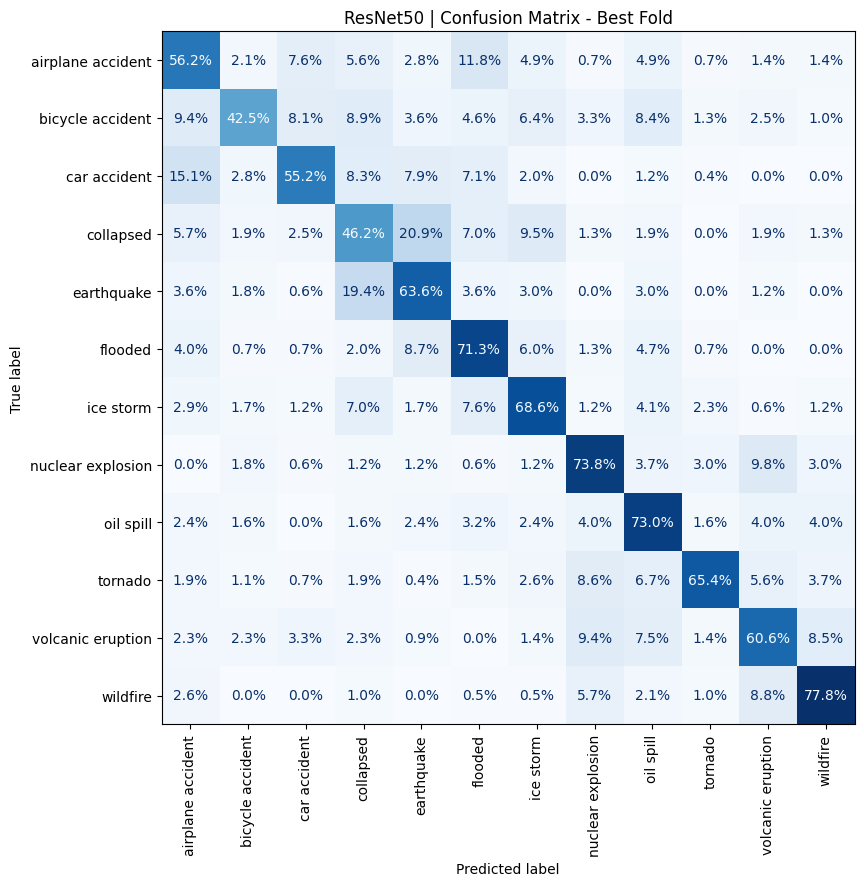

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(9, 9))

r50_cm_display = ConfusionMatrixDisplay.from_predictions(
    r50_cm[-1], r50_cm[-2], cmap=plt.cm.Blues, 
    display_labels=[class_mapping[str(i)] for i in range(len(class_mapping))],
    normalize='true', colorbar=False, xticks_rotation='vertical',
    ax=ax, values_format='.1%'
)
ax.set_title('ResNet50 | Confusion Matrix - Best Fold')

Text(0.5, 1.0, 'Wide ResNet50 | Confusion Matrix - Best Fold')

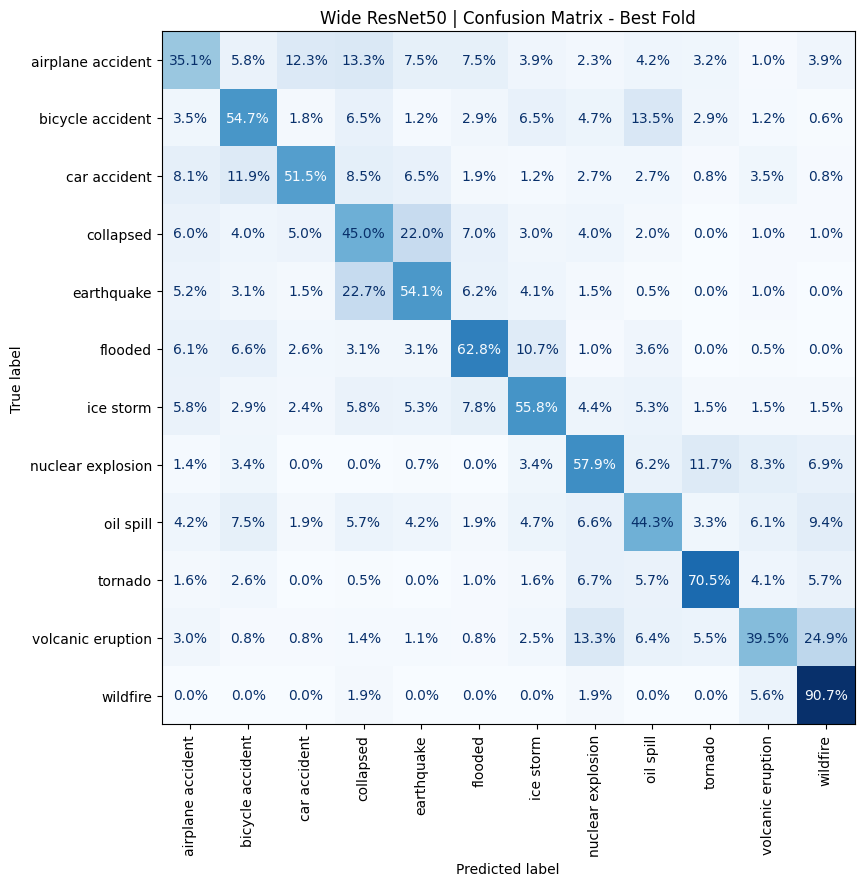

In [24]:
fig, ax = plt.subplots(figsize=(9, 9))

wr50_cm_display = ConfusionMatrixDisplay.from_predictions(
    wr50_cm[-1], wr50_cm[-2], cmap=plt.cm.Blues, 
    display_labels=[class_mapping[str(i)] for i in range(len(class_mapping))],
    normalize='true', colorbar=False, xticks_rotation='vertical',
    ax=ax, values_format='.1%'
)
ax.set_title('Wide ResNet50 | Confusion Matrix - Best Fold')

In [31]:
tl_data_resnet50 = pd.read_csv(os.path.join(cp_folder, 'TransferLearning_resnet50/progress.csv'))
tl_data_wresnet50 = pd.read_csv(os.path.join(cp_folder, 'TransferLearning_wide_resnet50/progress.csv'))

In [27]:
tl_data_resnet50

,loss,accuracy,confusion_matrix,precision,recall,f1,timestamp,checkpoint_dir_name,should_checkpoint,done,...,pid,hostname,node_ip,time_since_restore,iterations_since_restore,summary/epoch/0,summary/train_loss/0,summary/train_acc/0,summary/val_loss/0,summary/val_acc/0
0,0.802462,0.793750,"(array([[162, 2, 7, 10, 7, 6, 5, ...",0.796313,0.793750,0.792774,1713225018,checkpoint_000000,True,False,...,1839,f8e00118995a,172.28.0.12,9253.317525,1,1.0,1.208196,0.699688,0.802462,0.79375
1,0.623118,0.822500,"(array([[165, 3, 6, 9, 9, 4, 3, ...",0.823935,0.822500,0.822508,1713229010,checkpoint_000001,True,False,...,1839,f8e00118995a,172.28.0.12,13245.556736,2,1.0,1.208196,0.699688,0.802462,0.79375
2,0.576804,0.834583,"(array([[175, 3, 2, 8, 2, 4, 4, ...",0.836871,0.834583,0.834548,1713233014,checkpoint_000002,True,False,...,1839,f8e00118995a,172.28.0.12,17248.703231,3,1.0,1.208196,0.699688,0.802462,0.79375
3,0.536988,0.838750,"(array([[180, 3, 2, 6, 2, 5, 4, ...",0.840044,0.838750,0.838730,1713237028,checkpoint_000003,True,False,...,1839,f8e00118995a,172.28.0.12,21262.007893,4,1.0,1.208196,0.699688,0.802462,0.79375
4,0.499777,0.845833,"(array([[174, 2, 3, 8, 4, 4, 4, ...",0.846287,0.845833,0.845753,1713241069,checkpoint_000004,True,False,...,1839,f8e00118995a,172.28.0.12,25303.607063,5,1.0,1.208196,0.699688,0.802462,0.79375


In [32]:
from numpy import array

tl_data_resnet50['confusion_matrix'] = tl_data_resnet50['confusion_matrix'].apply(lambda x: eval(x))
tl_data_wresnet50['confusion_matrix'] = tl_data_wresnet50['confusion_matrix'].apply(lambda x: eval(x))

In [34]:
cm_tl_resnet50 = tl_data_resnet50.iloc[tl_data_resnet50['accuracy'].idxmax()]['confusion_matrix']
cm_tl_wresnet50 = tl_data_wresnet50.iloc[tl_data_wresnet50['accuracy'].idxmax()]['confusion_matrix']

Text(0.5, 1.0, 'Pre-trained ResNet50 | Confusion Matrix')

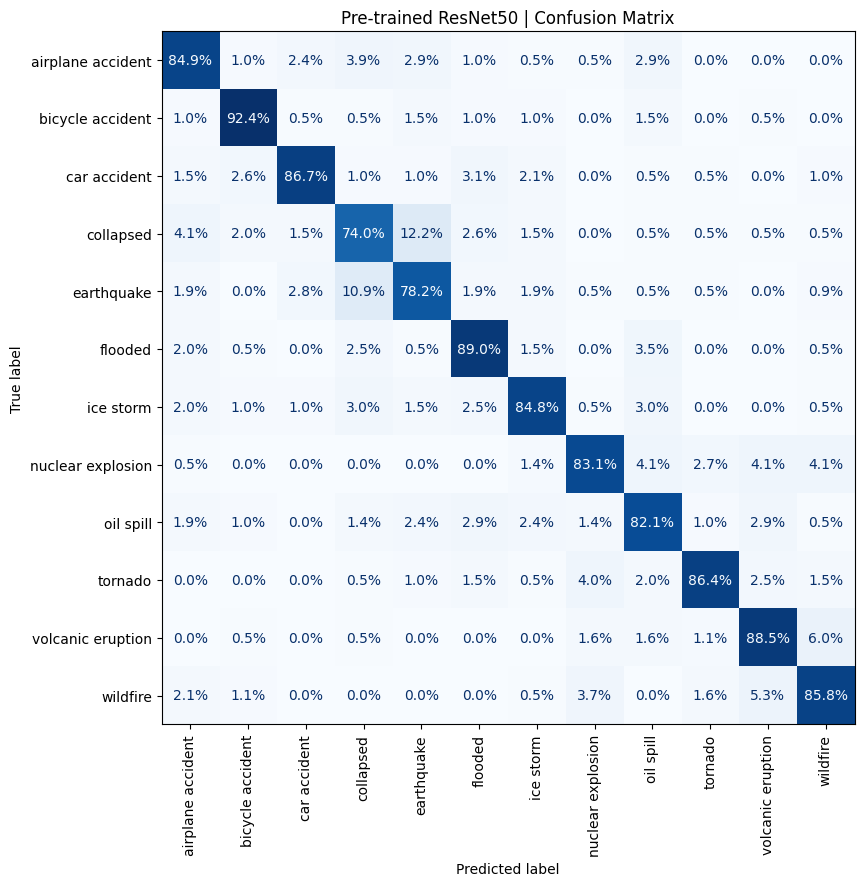

In [35]:
fig, ax = plt.subplots(figsize=(9, 9))

r50_cm_tl_display = ConfusionMatrixDisplay.from_predictions(
    cm_tl_resnet50[-1], cm_tl_resnet50[-2], cmap=plt.cm.Blues, 
    display_labels=[class_mapping[str(i)] for i in range(len(class_mapping))],
    normalize='true', colorbar=False, xticks_rotation='vertical',
    ax=ax, values_format='.1%'
)
ax.set_title('Pre-trained ResNet50 | Confusion Matrix')

Text(0.5, 1.0, 'Pre-trained Wide ResNet50 | Confusion Matrix')

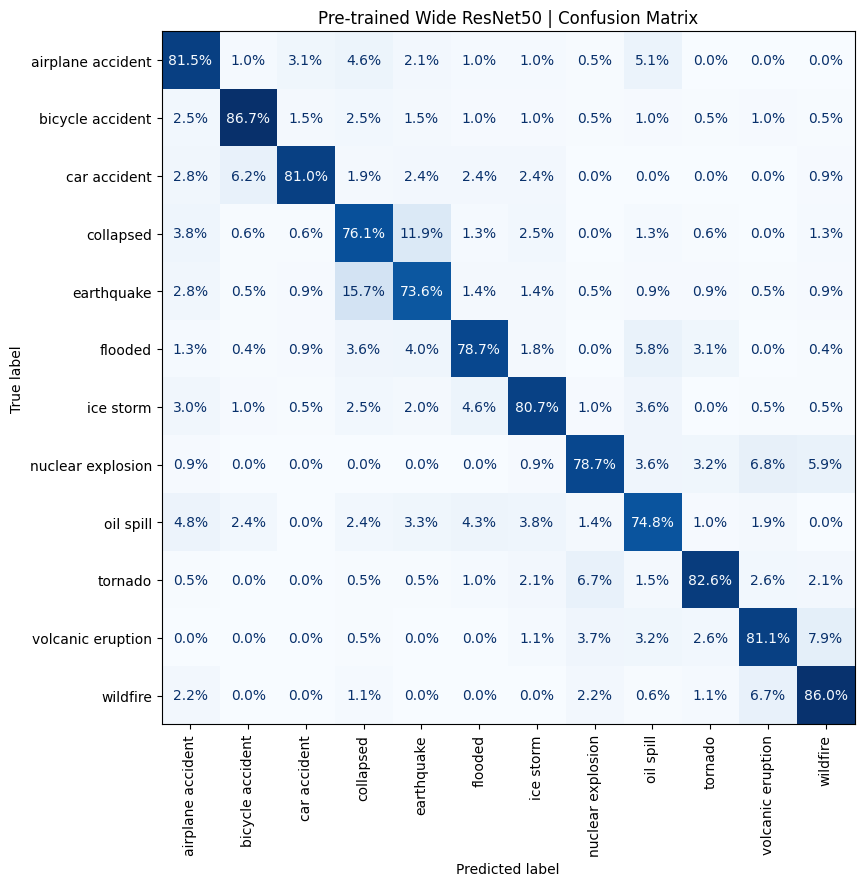

In [36]:
fig, ax = plt.subplots(figsize=(9, 9))

wr50_cm_tl_display = ConfusionMatrixDisplay.from_predictions(
    cm_tl_wresnet50[-1], cm_tl_wresnet50[-2], cmap=plt.cm.Blues, 
    display_labels=[class_mapping[str(i)] for i in range(len(class_mapping))],
    normalize='true', colorbar=False, xticks_rotation='vertical',
    ax=ax, values_format='.1%'
)
ax.set_title('Pre-trained Wide ResNet50 | Confusion Matrix')